In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/Users/pratyashasharma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:

iris = datasets.load_iris()
train = pd.DataFrame(iris.data)
flower_class = pd.DataFrame(iris.target)
flower_class.columns =['flower_type']
train = pd.concat([train,flower_class],axis = 1)

train[:5]

,0,1,2,3,flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:

logmodel = LogisticRegression()


In [5]:
target = pd.get_dummies(train['flower_type'])
target.columns = iris.target_names
target

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [6]:
train = pd.concat([train, target],axis = 1)


In [7]:
y = train['flower_type']
x = train.drop('flower_type',axis =1)


In [8]:

x_train,x_test, y_train, y_test = train_test_split(x, y ,test_size=0.3)
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predictions = logmodel.predict(x_test)

In [10]:

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        45



In [11]:


print(confusion_matrix(y_test,predictions))

[[24  0  0]
 [ 0 12  0]
 [ 0  0  9]]


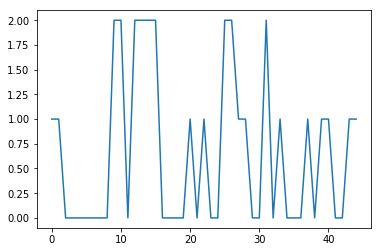

In [12]:
plt.plot(predictions)
plt.show()

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        21
          1       0.00      0.00      0.00        24
          2       0.00      0.00      0.00         0

avg / total       0.00      0.00      0.00        45



/Users/pratyashasharma/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


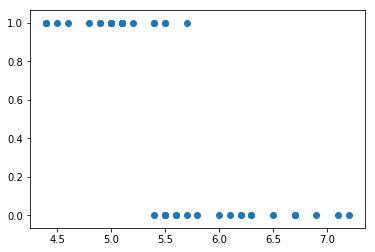

[[ 0 12  9]
 [24  0  0]
 [ 0  0  0]]


In [13]:
logmodel2 = LogisticRegression()
logmodel2.fit(x_train,x_train['setosa'])
predictions2 = logmodel2.predict(x_test)
print(classification_report(x_test['setosa'],predictions))
plt.scatter(x_test[0],predictions2)

plt.show()
print(confusion_matrix(x_test['setosa'],predictions))

In [19]:
# starting from the start

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['y']
df = pd.concat([x,y],axis = 1)
df2 = df[df['y']!=2]
    


In [ ]:
import math

def sigmoid(m,x):
    h = 1 / (1 + math.exp(-x * m))
    return h


def cost(y,h):
    c = -1/m * np.sum(y * np.log(h) + (1-y) * (np.log(1-h)))
    return c

def gradient_descent(x,h,y) :
    dz = h - y
    dz = dz.reshape((1,100))
    dm = 1/m * np.dot(x, dz)
    return dm

def gd_driver(x,y, learning_rate, num_iterations):
    m = 0
    cost_i = np.array(100)
    num_i = np.array(100)
    for i in range(num_iterations):
        h = sigmoid(m,x)
        gd = gradient_descent(x,h,y)
        cost_i = np.append(cost_i, cost(y,h))
        num_i.append(i)
    print(cost_i)
    return (m)
    
    
def run():
    x = np.array((100,4))
    y = np.array((100,1))
    x = np.append(x, iris.data)
    y = np.append(y , iris.target)
    learning_rate = 0.0001
    num_iterations = 10
    final_m = gd_driver(x,y, learning_rate, num_iterations)
    print(final_m)
    

In [15]:
from sklearn.utils import shuffle
df = shuffle(df)
df


,0,1,2,3,y
86,6.7,3.1,4.7,1.5,1
133,6.3,2.8,5.1,1.5,2
2,4.7,3.2,1.3,0.2,0
48,5.3,3.7,1.5,0.2,0
70,5.9,3.2,4.8,1.8,1
144,6.7,3.3,5.7,2.5,2
22,4.6,3.6,1.0,0.2,0
69,5.6,2.5,3.9,1.1,1
90,5.5,2.6,4.4,1.2,1
5,5.4,3.9,1.7,0.4,0


In [16]:
Y = df['y']
X = df.drop('y',axis = 1)
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)
